# Preparando os dados

## Realizando a Importação das Bibliotecas

In [151]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

## Criando/Simulando o Dataset

In [152]:
# Criação dos produtos e categorias. Pode ser adicionado/retirado qualquer produto/categoria.
produtos = ["Teclado", "Mouse", "Monitor", "Impressora", "Cadeira", "Mesa", "Headset", "Webcam", "Notebook"]
categorias = {
    "Teclado": "Periféricos",
    "Mouse": "Periféricos",
    "Monitor": "Display",
    "Impressora": "Impressão",
    "Cadeira": "Mobiliário",
    "Mesa": "Mobiliário",
    "Headset": "Áudio",
    "Webcam": "Vídeo",
    "Notebook": "Computadores"
}

In [153]:
# Setando as datas de início e fim pedidas.
data_de_inicio = datetime(2023, 1, 1)
data_de_fim = datetime(2023, 12, 31)

# Criando função para gerar datas aleatórias (para o dataset).
def datas_aleatorias(inicio, fim):
    delta = fim - inicio
    dias = random.randint(0, delta.days)
    return inicio + timedelta(days=dias)

In [154]:
# Criando uma lista para colocar as informações sobre o dataset.
dados = []
# Loop para colocar os itens necessários com valores aleatórios.
for i in range(50):
  produto = random.choice(produtos)
  dados.append([
    i + 1,
    datas_aleatorias(data_de_inicio, data_de_fim),
    produto,
    categorias[produto],
    random.randint(1, 20),
    round(random.uniform(10.0, 2000.0), 2)
  ])

df = pd.DataFrame(dados, columns=["ID", "Data", "Produto", "Categoria", "Quantidade", "Preço"])

In [155]:
# Função para exemplificar os nulos e as duplicatas.
def inserir_nans_e_duplicatas(df):
  linhas_para_duplicar = []
  for i in range(0, len(df), 10):
    if random.choice([True, False]):
      df.loc[i, "Preço"] = np.nan
  for i in range(0, len(df), 10):
    if random.choice([True, False]):
      df.loc[i, "Categoria"] = np.nan
  n_duplicatas = max(1, int(len(df) * 0.1))
  linhas_para_duplicar = df.sample(n_duplicatas, replace=False)
  df = pd.concat([df, linhas_para_duplicar], ignore_index=True)
  return df

df = inserir_nans_e_duplicatas(df)

In [156]:
df.head(15)

,ID,Data,Produto,Categoria,Quantidade,Preço
0,1,2023-03-20,Mesa,Mobiliário,13,901.94
1,2,2023-01-15,Cadeira,Mobiliário,9,526.30
2,3,2023-06-18,Teclado,Periféricos,18,674.27
3,4,2023-05-20,Teclado,Periféricos,5,77.98
4,5,2023-09-01,Mouse,Periféricos,6,821.75
5,6,2023-09-22,Notebook,Computadores,11,1789.80
6,7,2023-12-16,Teclado,Periféricos,12,769.13
7,8,2023-02-04,Mesa,Mobiliário,14,529.80
8,9,2023-07-12,Mouse,Periféricos,20,902.17
9,10,2023-03-08,Mouse,Periféricos,9,73.27


# Limpeza e Análise de Dados de Vendas

## Limpando e Padronizando os Dados

In [157]:
# Tratamento dos valores nulos. O primeiro código é usado quando não se tem o map feito anteriormente ou se é desconhecida as possíveis categorias. O segundo código é usado quando se tem um map e conhce todas as possíveis categorias.
## df["Categoria"].fillna("Desconhecido", inplace=True)
df["Categoria"] = df.apply(lambda row: categorias.get(row["Produto"], "Sem Categoria") if pd.isna(row["Categoria"]) else row["Categoria"], axis=1)

In [158]:
# Removendo valores nulos e duplicatas. O valores nulos são removidos pois a coluna "preço" é de suma importância para a análise e não há como trata-la (existem métodos de média ou padronizando colocando 0 em todos. Mas nesse caso, preferiu-se eliminar).
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [159]:
df.head(15)

,ID,Data,Produto,Categoria,Quantidade,Preço
0,1,2023-03-20,Mesa,Mobiliário,13,901.94
1,2,2023-01-15,Cadeira,Mobiliário,9,526.30
2,3,2023-06-18,Teclado,Periféricos,18,674.27
3,4,2023-05-20,Teclado,Periféricos,5,77.98
4,5,2023-09-01,Mouse,Periféricos,6,821.75
5,6,2023-09-22,Notebook,Computadores,11,1789.80
6,7,2023-12-16,Teclado,Periféricos,12,769.13
7,8,2023-02-04,Mesa,Mobiliário,14,529.80
8,9,2023-07-12,Mouse,Periféricos,20,902.17
9,10,2023-03-08,Mouse,Periféricos,9,73.27


In [160]:
# Convertendo os dados para os tipos corretos.
df["Data"] = pd.to_datetime(df["Data"], errors="coerce")
df["Quantidade"] = df["Quantidade"].astype(int)
df["Preço"] = df["Preço"].astype(float)

In [161]:
# Salvando o arquivo.
df.to_csv("data_clean.csv", index=False)

## Análise de Dados de Vendas

In [162]:
# Criando o total de vendas por produto.
df["Total_Vendas"] = df["Quantidade"] * df["Preço"]
total_vendas_produto = df.groupby("Produto")["Total_Vendas"].sum().sort_values(ascending=False)

In [163]:
# Identicando o produto com maior número de vendas.
maior_produto = total_vendas_produto.idxmax()
maior_valor = total_vendas_produto.max()
print(f"{maior_produto} - R$ {round(maior_valor, 2)}")

Notebook - R$ 83422.75


# Análise Exploratória de Dados de Vendas

## Vendas por Período

In [164]:
# Criando o dataset por mês.
df_mensal = df.groupby(df['Data'].dt.to_period('M')).agg({"Total_Vendas": "sum"}).reset_index()
df_mensal['Data'] = df_mensal['Data'].dt.to_timestamp()

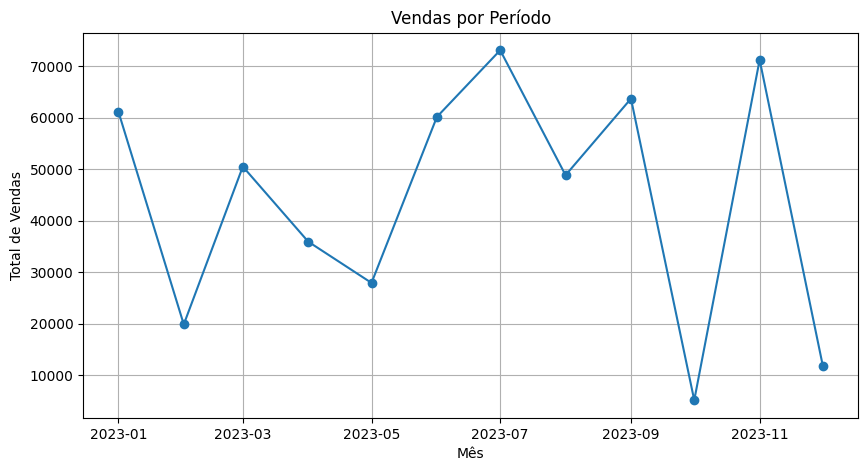

In [165]:
# Plotando o gráfico de Vendas ao longo do tempo (Período).
plt.figure(figsize=(10,5))
plt.plot(df_mensal['Data'], df_mensal['Total_Vendas'], marker='o', linestyle='-')
plt.title('Vendas por Período')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.show()

In [166]:
# Insights: maior e menor mês e seus valores de vendas.
maior_mes = df_mensal.loc[df_mensal['Total_Vendas'].idxmax()]
menor_mes = df_mensal.loc[df_mensal['Total_Vendas'].idxmin()]
print(f"{maior_mes['Data'].strftime('%B')} - R$ {round(maior_mes['Total_Vendas'], 2)}")
print(f"{menor_mes['Data'].strftime('%B')} - R$ {round(menor_mes['Total_Vendas'], 2)}")

July - R$ 73071.67
October - R$ 5116.13


## Preço Médio por Categoria

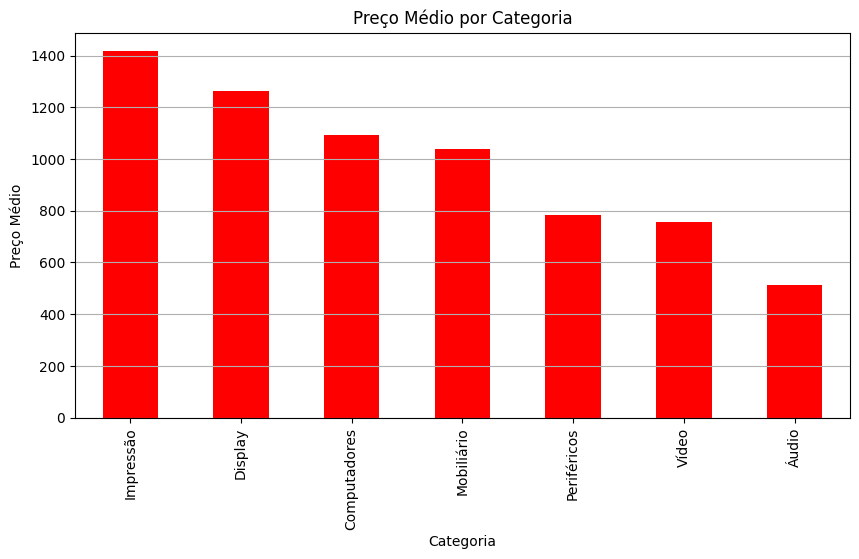

In [167]:
# Plotando o gráfico de preço médio por categoria.
preco_medio_categoria = df.groupby("Categoria")["Preço"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
preco_medio_categoria.plot(kind='bar', color='red')
plt.title('Preço Médio por Categoria')
plt.ylabel('Preço Médio')
plt.xlabel('Categoria')
plt.grid(axis='y')
plt.show()

In [168]:
# Insights: a maior e a menor categoria e os seus preços médios.
cat_maior_preco = preco_medio_categoria.idxmax()
val_maior_preco = preco_medio_categoria.max()
cat_menor_preco = preco_medio_categoria.idxmin()
val_menor_preco = preco_medio_categoria.min()
print(f"{cat_maior_preco} - R$ {round(val_maior_preco, 2)}")
print(f"{cat_menor_preco} - R$ {round(val_menor_preco, 2)}")

Impressão - R$ 1417.26
Áudio - R$ 511.29


## Quantidade Total Vendida por Produto

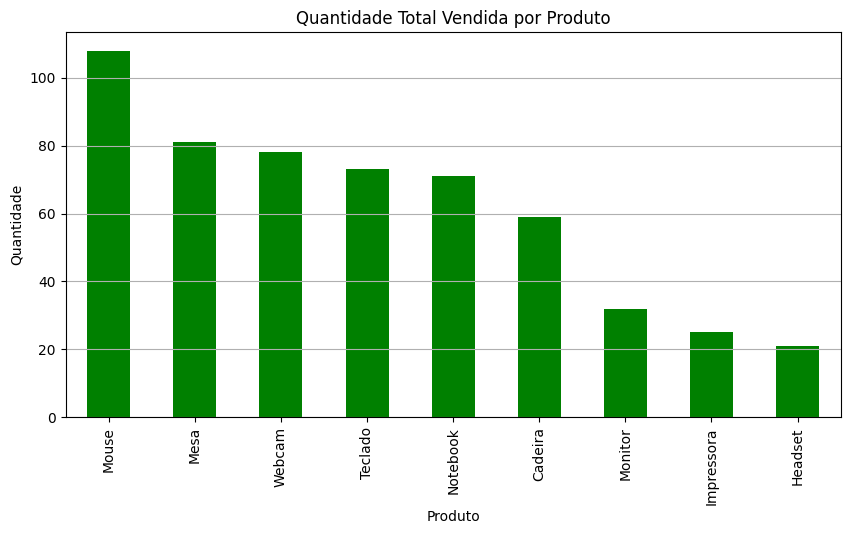

In [169]:
# Plotando o gráfico de quantidade vendida por produto.
quantidade_por_produto = df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
quantidade_por_produto.plot(kind='bar', color='green')
plt.title('Quantidade Total Vendida por Produto')
plt.ylabel('Quantidade')
plt.xlabel('Produto')
plt.grid(axis='y')
plt.show()

In [170]:
# Insights: a maior e o menor produto e as suas quantidades vendidas.
prod_maior_qtd = quantidade_por_produto.idxmax()
val_maior_qtd = quantidade_por_produto.max()
prod_menor_qtd = quantidade_por_produto.idxmin()
val_menor_qtd = quantidade_por_produto.min()
print(f"{prod_maior_qtd} - {val_maior_qtd}")
print(f"{prod_menor_qtd} - {val_menor_qtd}")

Mouse - 108
Headset - 21
